## Exploratory data analysis
AI project methodology - EPITA

### Packages import

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import creditscore.preprocess as preproc


### Importing data
- Import both csv files. We use the option `low_memory=False` since the training dataset has a lot of fields and those have many types of data.

In [34]:
df_train = pd.read_csv('../data/train.csv', low_memory=False)
df_test = pd.read_csv('../data/test.csv')
df_train.shape, df_test.shape

((100000, 28), (50000, 27))

- We review the description of the pandas DataFrames (only numerical values)

In [35]:
df_train.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [36]:
df_test.describe(include="number").T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,42502.0,4182.004291,3174.109304,303.645417,1625.188333,3086.305000,5934.189094,15204.633333
Num_Bank_Accounts,50000.0,16.838260,116.396848,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,50000.0,22.921480,129.314804,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,50000.0,68.772640,451.602363,1.000000,8.000000,13.000000,20.000000,5799.000000
Delay_from_due_date,50000.0,21.052640,14.860397,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,48965.0,30.080200,196.984121,0.000000,4.000000,7.000000,10.000000,2593.000000
Credit_Utilization_Ratio,50000.0,32.279581,5.106238,20.509652,28.061040,32.280390,36.468591,48.540663
Total_EMI_per_month,50000.0,1491.304305,8595.647887,0.000000,32.222388,74.733349,176.157491,82398.000000


- Describe dataset (only categorical values)

In [37]:
df_train.describe(include="object").T

,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


In [38]:
df_test.describe(include='object').T

,count,unique,top,freq
ID,50000,50000,0x160a,1
Customer_ID,50000,12500,CUS_0xd40,4
Month,50000,4,September,12500
Name,44985,10139,Stevex,22
Age,50000,976,39,1493
SSN,50000,12501,#F%$D@*&8,2828
Occupation,50000,16,_______,3438
Annual_Income,50000,16121,109945.32,8
Num_of_Loan,50000,263,2,7173
Type_of_Loan,44296,6260,Not Specified,704


- Analyzing data types (auto-assigned)

In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [40]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

- Let's see the correlation of Occupation and the Credit_Score

In [41]:
df_train = preproc.clean_strange_values(df_train)
df_test = preproc.clean_strange_values(df_test)

df_train = preproc.transform_datatypes(df_train)
df_test = preproc.transform_datatypes(df_test)

/Users/sergiomorales/miniforge3/envs/cred-score/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


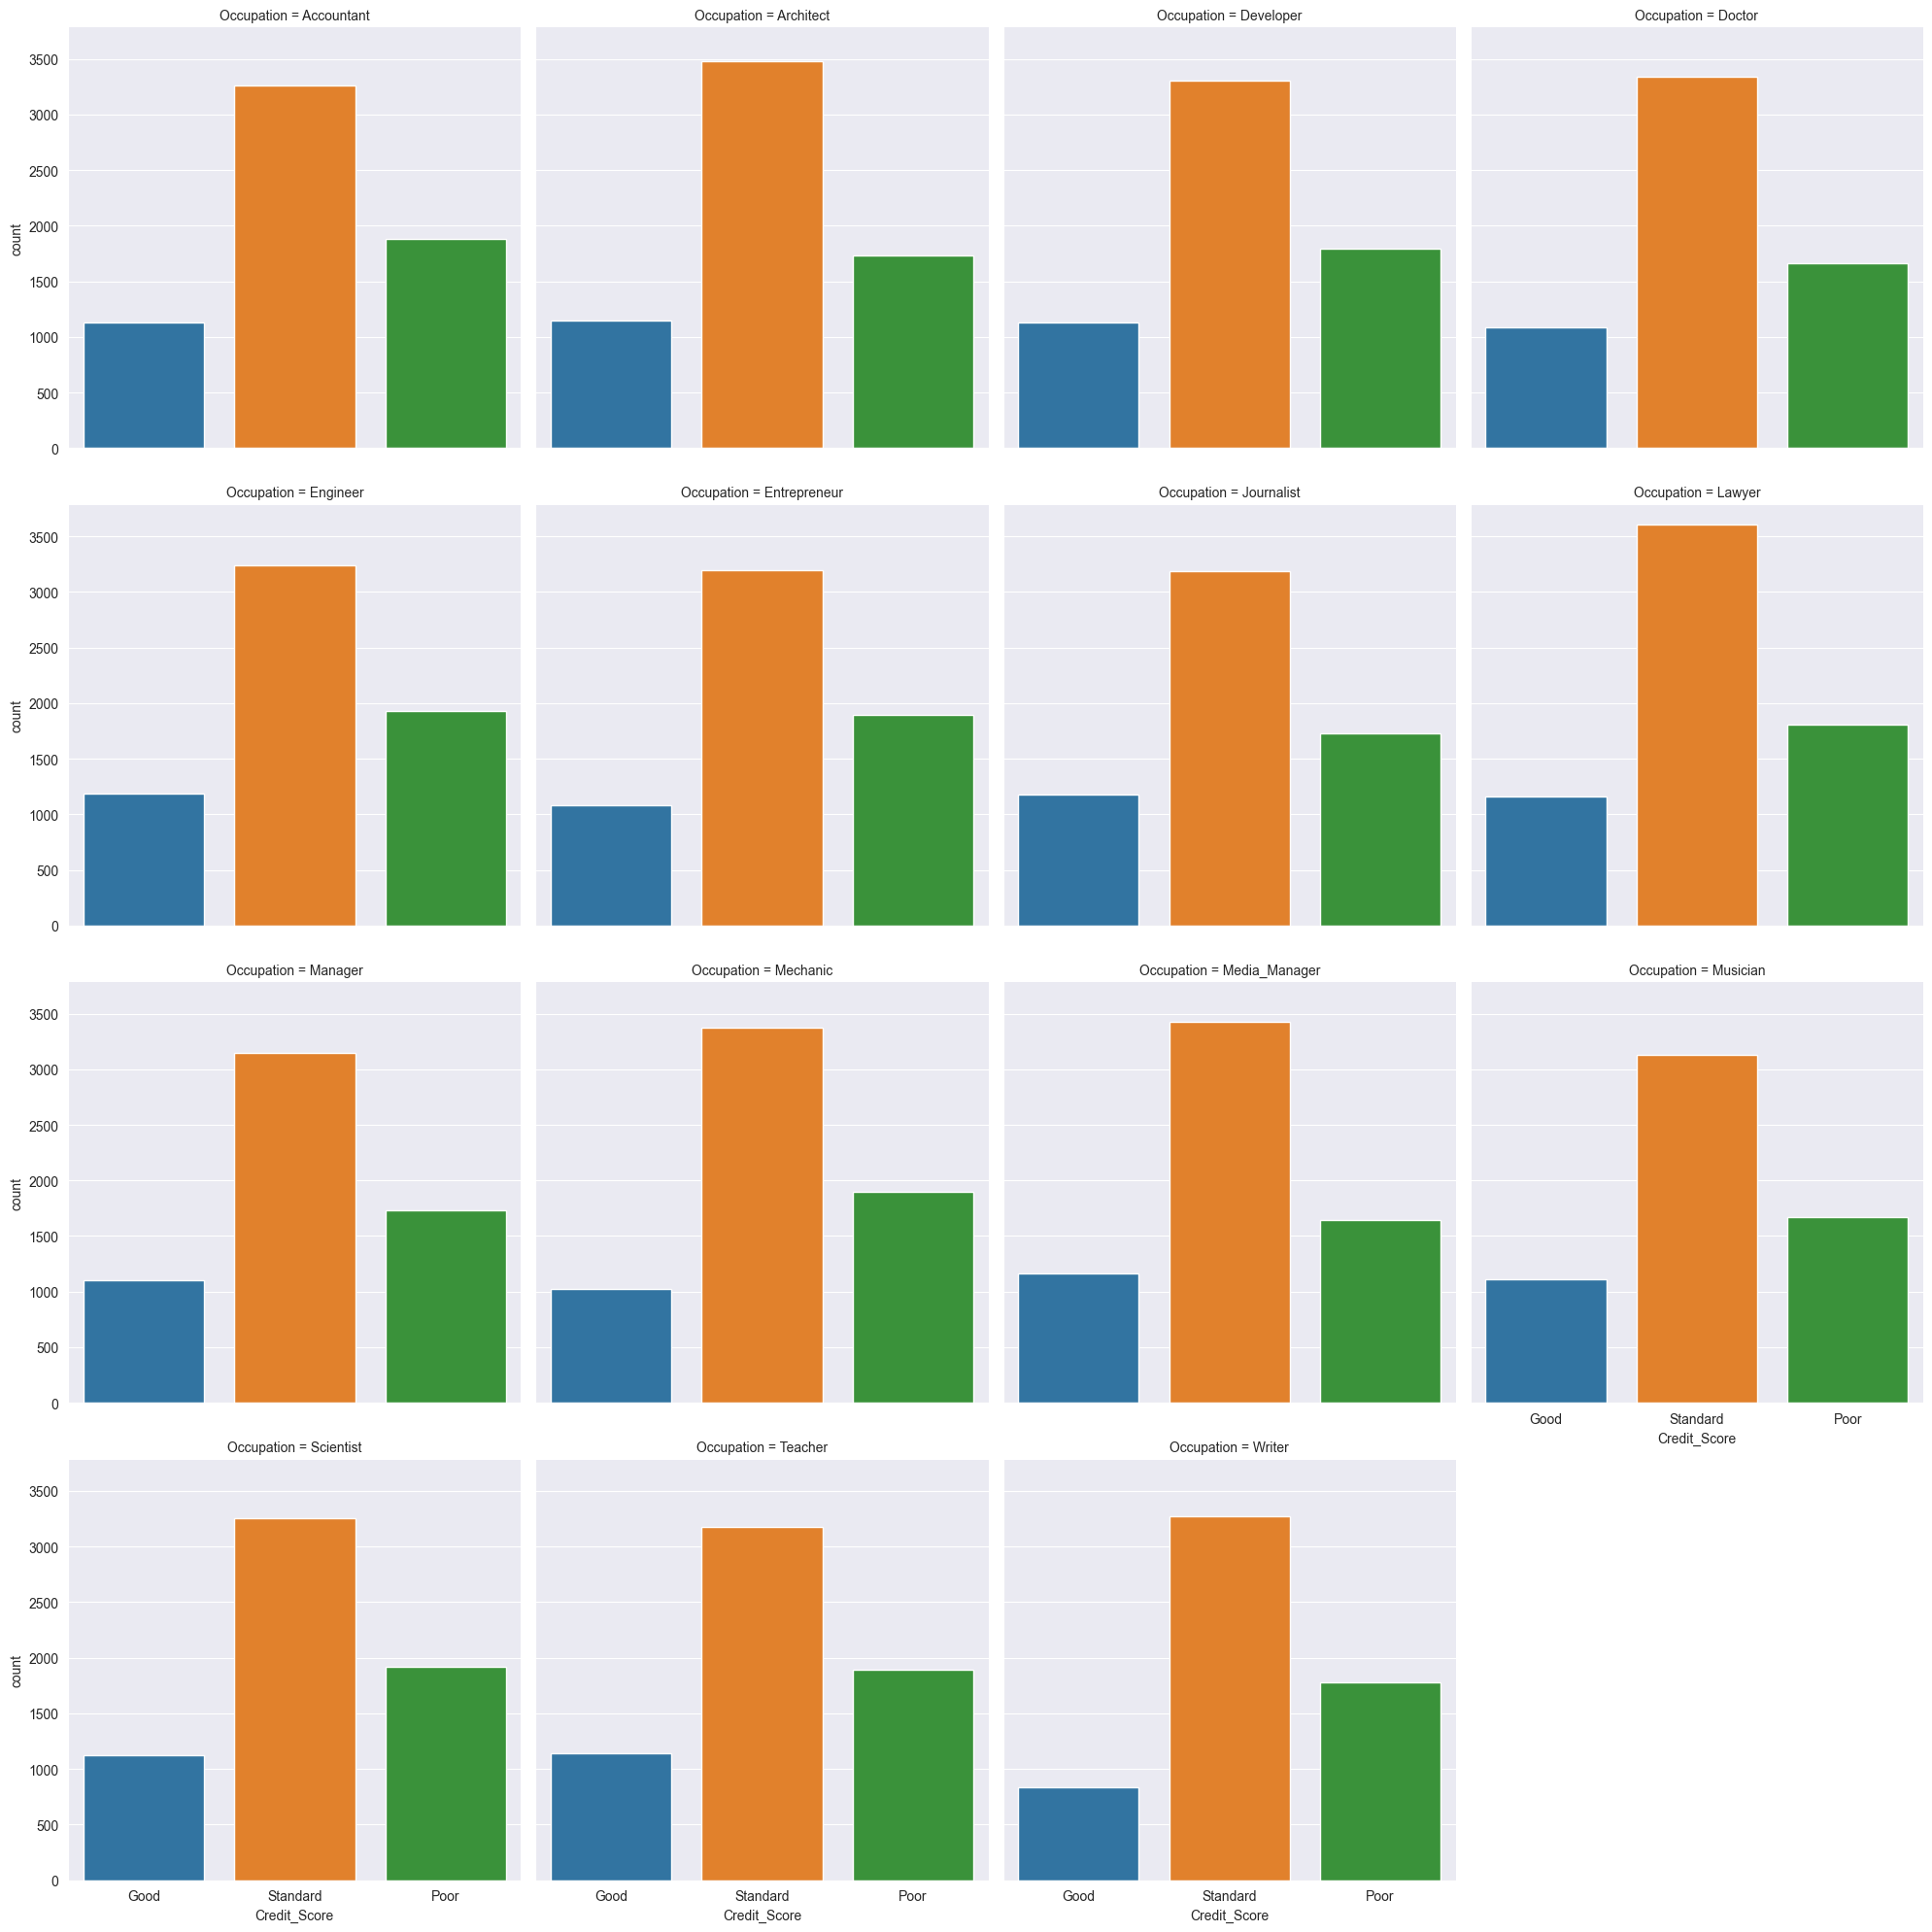

In [42]:
sns.catplot('Credit_Score', col='Occupation', data=df_train, kind='count', col_wrap=4)

- We analyze the distribution of Age

/Users/sergiomorales/miniforge3/envs/cred-score/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Customer Age Distribution')

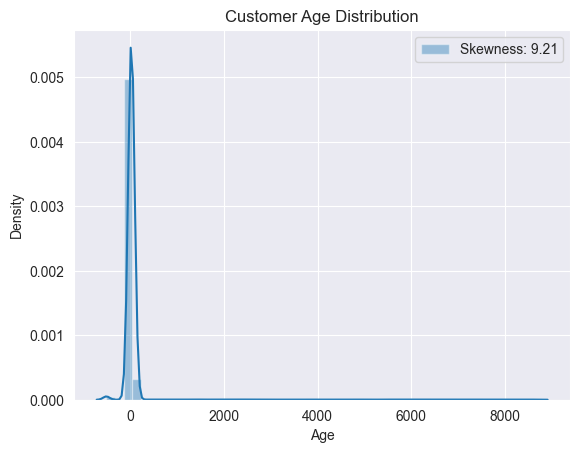

In [43]:
sns.distplot(df_train['Age'], label='Skewness: %.2f' % (df_train['Age'].skew()))
plt.legend(loc='best')
plt.title('Customer Age Distribution')

- We review the Monthly Salary Distribution

In [ ]:
sns.distplot(df_train['Monthly_Inhand_Salary'], label = 'Skewness: %.2f'%(df_train['Monthly_Inhand_Salary'].skew()))
plt.legend(loc = 'best')
plt.title('Customer Monthly Salary Distribution')

- And also let's analyse the customer debt

In [ ]:
sns.distplot(df_train['Outstanding_Debt'], label = 'Skewness: %.2f'%(df_train['Outstanding_Debt'].skew()))
plt.legend(loc = 'best')
plt.title("Customer's Outstanding Debt  Distribution")

### Data transformations
- Clean strange values apart from the NaN values

In [ ]:
df_train = preproc.clean_strange_values(df_train)
df_test = preproc.clean_strange_values(df_test)

In [ ]:
display(
    df_train.head(),
    print(''),
    df_test.head()
)

- Reviewing the amount of null values

In [ ]:
plt.figure(figsize=(7, 3))
sns.heatmap(df_train.isna().transpose(),
            cbar_kws={'label': 'Missing Data'})

In [ ]:
plt.figure(figsize=(7, 3))
sns.heatmap(df_test.isna().transpose(),
            cbar_kws={'label': 'Missing Data'})

- We define new datatypes for some columns

In [ ]:
df_train = preproc.transform_datatypes(df_train)
df_test = preproc.transform_datatypes(df_test)

In [ ]:
df_train.info()

- We reset the index to use the id

In [ ]:
df_train = df_train.set_index('ID')
df_train

In [ ]:
df_test = df_test.set_index('ID')
df_test

- We drop useless columns for the purpose of calculating the score, these columns don't have any relationship on the calculation

In [ ]:
COLS_TO_DROP = ['Customer_ID', 'Name', 'SSN']
print('Before')
print(df_test.shape, df_train.shape)

df_train = df_train.drop(COLS_TO_DROP, axis=1)
df_test = df_test.drop(COLS_TO_DROP, axis=1)

print('After')
df_test.shape, df_train.shape